# **Portfolio 1 - Deep learning**

    Groepsnummer: 2
    Coach: Vikram 
    Opdrachtnummer: 1
    Namen groepsleden: 
        - Isa Dijkstra, 22119485
        - Natasja de Kok, 22059326
        - Vince Ammerlaan, 21049599
    Kaggle naam:
    
    
## ***Inhoudsopgave*** <a name='begin'></a>

1. [Data inladen](#data)
2. [Opdracht 1 -EDA](#eda)
3. [Opdracht 2 - Fully connected neuraal netwerk](#CNN)
4. [Opdracht 3 - Convolutioneel neuraal netwerk from scratch](#CNNs)
5. [Opdracht 4 - Transfer learning](#tl)
6. [Opdracht 5 - Multimodaal model](#mm)
7. [Opdracht 6 - Bevindingen](#bevindingen)
8. [Opdracht 7 - Conclusie en aanbevelingen](#conclusie)
9. [Bronnenlijst](#bronnenlijst)

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import plot_model
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Data inladen <a name='data'></a>

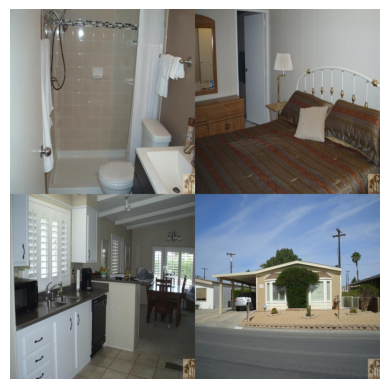

In [2]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = mpimg.imread(image_path)
    return image

inputPath = 'Train'

image = load_random_image(inputPath)

plt.imshow(image)
plt.axis('off') 
plt.show()

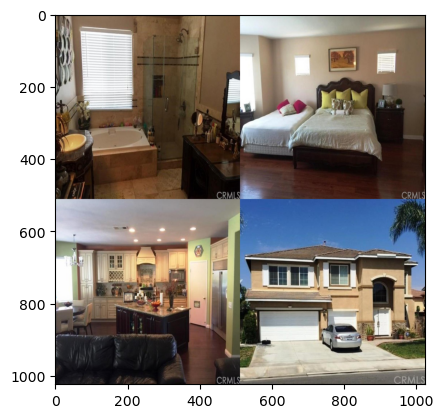

In [3]:
def load_random_image(path):
    files = os.listdir(path)
    image_files = [f for f in files if f.endswith('.png') or f.endswith('.jpg')]
    random_image_file = random.choice(image_files)
    image_path = os.path.join(path, random_image_file)
    image = Image.open(image_path)
    return image

image = load_random_image(inputPath)

plt.imshow(image)
plt.show()

In [4]:
def load_images_and_create_dataframe(directory):
    images = []
    filenames = []

    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            filepath = os.path.join(directory, filename)
            
            image = Image.open(filepath)
            image_array = np.array(image)
            images.append(image_array)
            filenames.append(filename)

    df = pd.DataFrame({'Filename': filenames, 'Image': images})
    
    df['Filename'] = df['Filename'].str.replace('.jpg', '')
    
    return df

inputPath = 'Train'
image_df = load_images_and_create_dataframe(inputPath)

C:\Users\Natasja\AppData\Local\Temp\ipykernel_17712\2535199622.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Filename'] = df['Filename'].str.replace('.jpg', '')


In [5]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [6]:
train2 = train.copy()
train2['House ID'] = train2['House ID'].astype(str)

merged_df = pd.merge(train2, image_df, left_on='House ID', right_on='Filename')

# Drop the redundant 'Filename' column if needed
merged_df.drop('Filename', axis=1, inplace=True)

# Convert each element in the 'Image' column to a NumPy array
merged_df['Image2'] = merged_df['Image'].apply(np.array)

# Convert the dtype of each NumPy array in the 'Image' column to float32 and normalize
merged_df['Image2'] = merged_df['Image2'].apply(lambda x: x.astype('float32') / 255.0)

merged_df

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price,Image,Image2
0,1,4,4.0,4053,33.6968,-111.8892,869500,"[[[156, 126, 98], [164, 137, 110], [180, 154, ...","[[[0.6117647, 0.49411765, 0.38431373], [0.6431..."
1,2,4,3.0,3343,34.8280,-119.0349,865200,"[[[227, 203, 175], [227, 203, 177], [226, 202,...","[[[0.8901961, 0.79607844, 0.6862745], [0.89019..."
2,3,3,4.0,3923,33.7669,-111.9182,889000,"[[[142, 94, 48], [117, 69, 29], [90, 43, 13], ...","[[[0.5568628, 0.36862746, 0.1882353], [0.45882..."
3,4,5,5.0,4022,33.7752,-111.7791,910000,"[[[244, 202, 162], [247, 203, 164], [246, 203,...","[[[0.95686275, 0.7921569, 0.63529414], [0.9686..."
4,5,3,4.0,4116,33.7669,-111.9182,971226,"[[[217, 244, 255], [228, 253, 255], [170, 189,...","[[[0.8509804, 0.95686275, 1.0], [0.89411765, 0..."
...,...,...,...,...,...,...,...,...,...
495,496,2,2.0,1257,35.6406,-120.7003,380000,"[[[138, 157, 161], [142, 157, 160], [145, 156,...","[[[0.5411765, 0.6156863, 0.6313726], [0.556862..."
496,497,4,2.0,2072,35.6406,-120.7003,429900,"[[[160, 157, 150], [160, 157, 150], [160, 157,...","[[[0.627451, 0.6156863, 0.5882353], [0.627451,..."
497,498,2,2.0,2213,35.6406,-120.7003,585000,"[[[221, 218, 211], [221, 218, 211], [221, 218,...","[[[0.8666667, 0.85490197, 0.827451], [0.866666..."
498,499,3,2.5,1500,35.6406,-120.7003,319000,"[[[145, 139, 115], [144, 138, 114], [146, 140,...","[[[0.5686275, 0.54509807, 0.4509804], [0.56470..."


[Terug naar Inhoudsopgave](#begin)

## Opdracht 1 - EDA <a name='eda'></a>

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
0,1,4,4.0,4053,33.6968,-111.8892,869500
1,2,4,3.0,3343,34.8280,-119.0349,865200
2,3,3,4.0,3923,33.7669,-111.9182,889000
3,4,5,5.0,4022,33.7752,-111.7791,910000
4,5,3,4.0,4116,33.7669,-111.9182,971226


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


House ID     0
Bedrooms     0
Bathrooms    0
Area         0
Latitude     0
Longitude    0
Price        0
dtype: int64

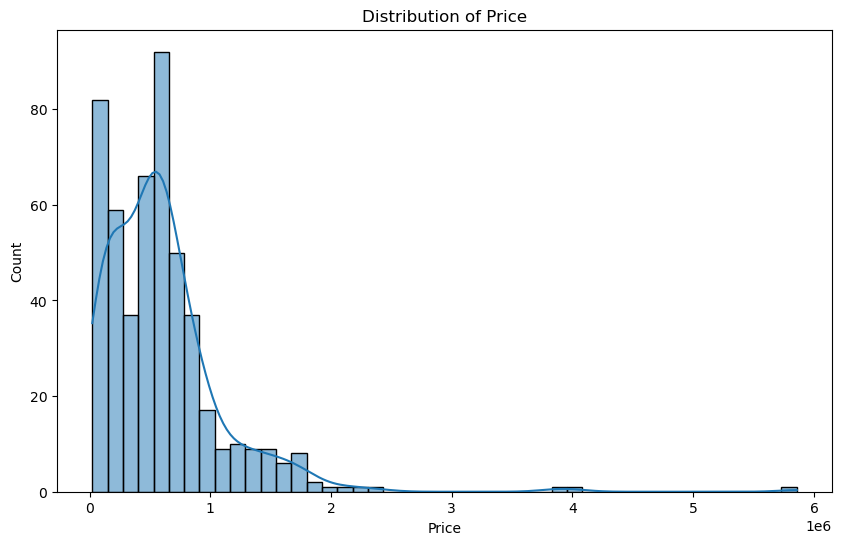

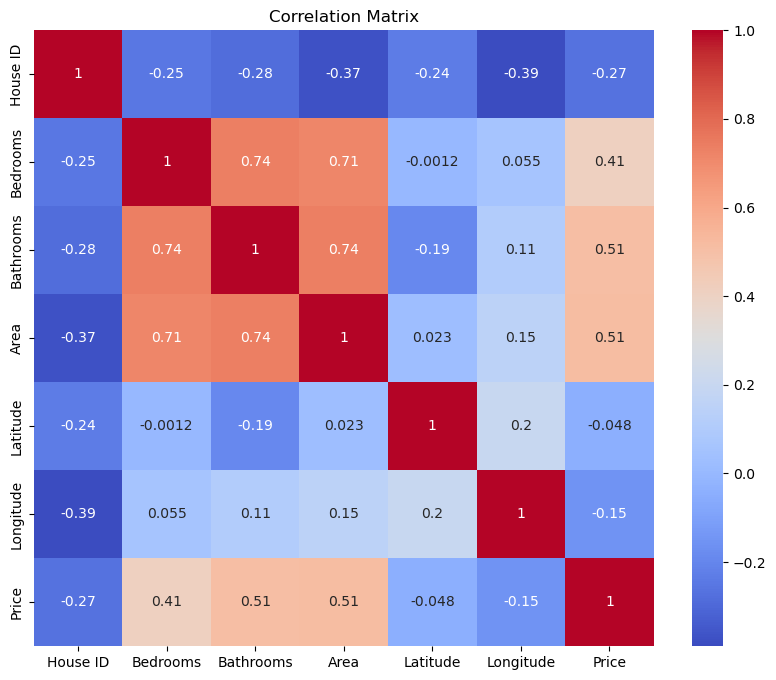

In [7]:
display(train.head())
display(train.describe())

#Missende waardes
display(train.isnull().sum())

# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Correlation matrix
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

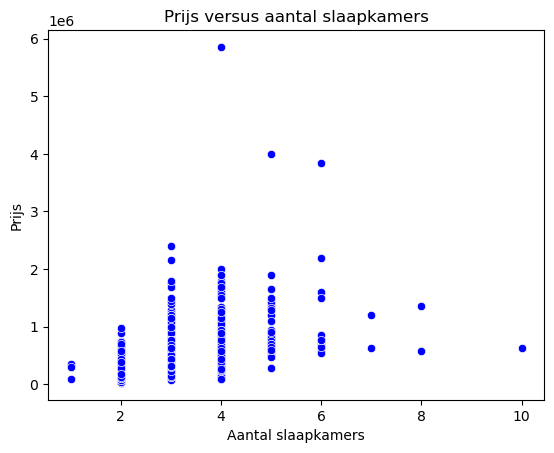

In [8]:
sns.scatterplot(data=train, x='Bedrooms', y='Price', color='blue')
plt.xlabel('Aantal slaapkamers')
plt.ylabel('Prijs')
plt.title('Prijs versus aantal slaapkamers')
plt.show()

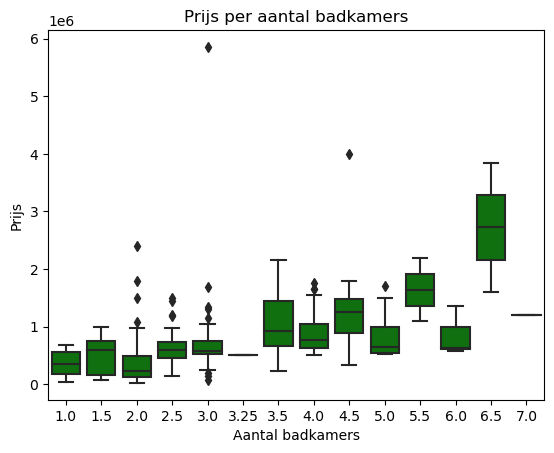

In [9]:
# Boxplot van prijs per aantal badkamers
sns.boxplot(data=train, x='Bathrooms', y='Price', color='green')
plt.xlabel('Aantal badkamers')
plt.ylabel('Prijs')
plt.title('Prijs per aantal badkamers')
plt.show()

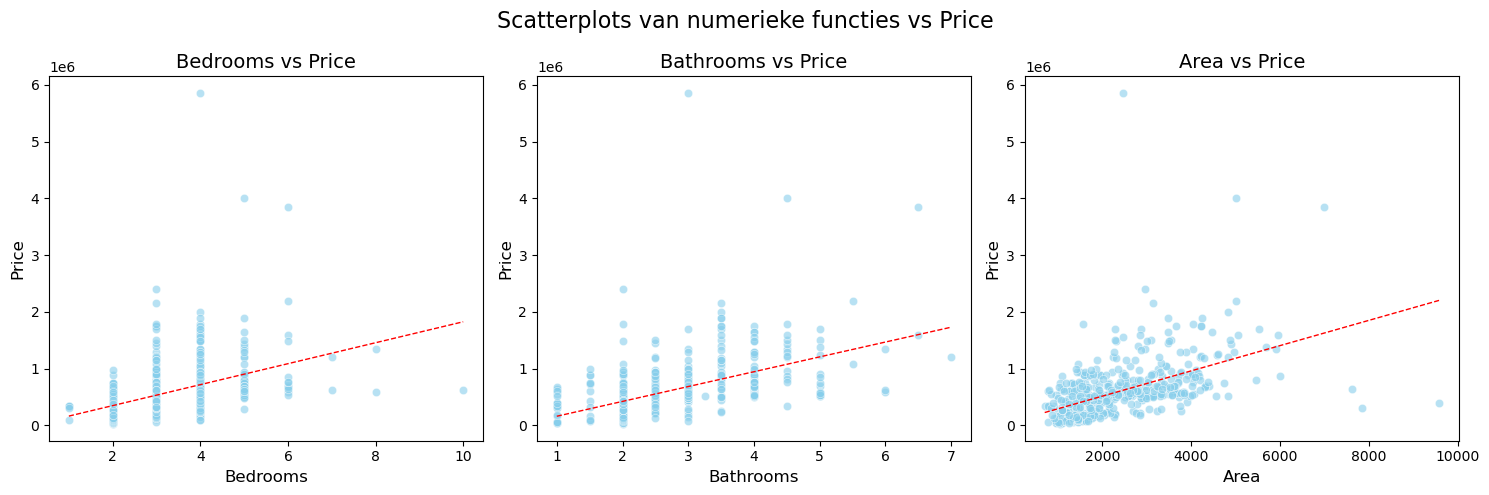

In [10]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).iloc[:, 1:-3]
num_plots = len(numeric_features.columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(numeric_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.scatterplot(x=col, y='Price', data=train, color='skyblue', alpha=0.6)
    sns.regplot(x=col, y='Price', data=train, scatter=False, color='red', ci=None, line_kws={'linewidth':1, 'linestyle':'--'})
    plt.title(f"{col} vs Price", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Price", fontsize=12)

plt.suptitle("Scatterplots van numerieke functies vs Price", fontsize=16)
plt.tight_layout()
plt.show()

[Terug naar Inhoudsopgave](#begin)

## Opdracht 2 - Fully connected neuraal netwerk <a name='CNN'></a>

### **Neuraal Netwerk**

In [11]:
features = train.drop('Price', axis=1)
target = train['Price'].astype(float)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
num_features = features.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mape')
history = model.fit(features_train, target_train, epochs=40, batch_size=32, validation_data=(features_test, target_test))
predictions = model.predict(features_test)

mape = mean_absolute_percentage_error(target_test, predictions)
print("Mean Absolute Pecrentage Error:", mape)

Epoch 1/40
13/13 [==============================] - 1s 18ms/step - loss: 99.9039 - val_loss: 99.7812
Epoch 2/40
13/13 [==============================] - 0s 4ms/step - loss: 99.7150 - val_loss: 99.5630
Epoch 3/40
13/13 [==============================] - 0s 5ms/step - loss: 99.4969 - val_loss: 99.2940
Epoch 4/40
13/13 [==============================] - 0s 5ms/step - loss: 99.2228 - val_loss: 98.9482
Epoch 5/40
13/13 [==============================] - 0s 4ms/step - loss: 98.8574 - val_loss: 98.4957
Epoch 6/40
13/13 [==============================] - 0s 4ms/step - loss: 98.3865 - val_loss: 97.8805
Epoch 7/40
13/13 [==============================] - 0s 4ms/step - loss: 97.7470 - val_loss: 97.0721
Epoch 8/40
13/13 [==============================] - 0s 4ms/step - loss: 96.8927 - val_loss: 95.9711
Epoch 9/40
13/13 [==============================] - 0s 4ms/step - loss: 95.7670 - val_loss: 94.5549
Epoch 10/40
13/13 [==============================] - 0s 4ms/step - loss: 94.3359 - val_loss: 92.777

### **Visualiseren**

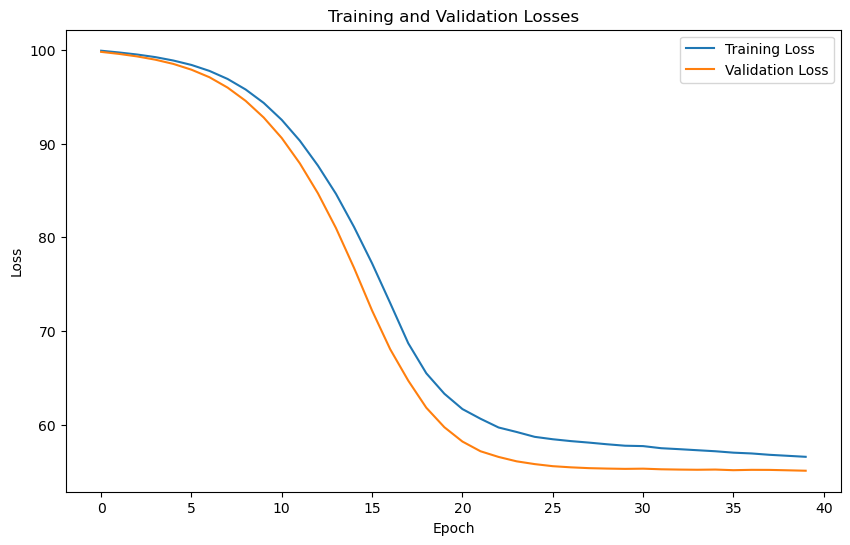

In [12]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

### **Modelarchitectuur**

Werkt niet helaas

In [13]:
#NKOK 14-3
!pip install pydot

In [14]:
#NKOK 14-3
"""
https://chat.openai.com/c/09836b3b-7638-4009-ba60-34f835cc2ee5
https://graphviz.org/download/
https://www.reddit.com/r/ObsidianMD/comments/11vwva6/has_anyone_used_this_graphviz_plugin_is_it_safe/
https://www.minitool.com/backup-tips/windows-protected-your-pc.html -> zet Firewall tijdelijk uit 
op app-controle om het te kunnen installeren.
https://datascience.stackexchange.com/questions/82860/what-is-the-use-of-function-build-in-custom-layers-in-tensorflow-keras
https://stackoverflow.com/questions/63383594/how-does-tensorflow-build-work-from-tf-keras-layers-layer
https://chat.openai.com/c/f6655a14-1621-49a3-9601-1910574ea70b
https://www.computerhope.com/issues/ch000549.htm#windows10
"""
!pip install graphviz
import graphviz

In [15]:
#NKOK 14-3
#later weghalen, maar dit is het pad dat ik heb toegevoegd aan System in windows
#dot = graphviz.Digraph(executable='C:\\Users\\Natasja\\Documents\\arbeid2024\\AI-semester2\\Deep Learning - 2\\Github folder groepsproject DL\\Deep-Learning-Groep-2\\Portfolio opdracht 1\\Graphviz\\bin\\dot.exe')
#


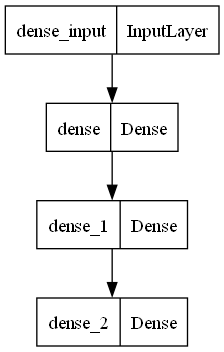

In [16]:
from tensorflow.keras.utils import plot_model

#NKOK 14-3
model.build(input_shape=(None, num_features))
#tot hier 

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False)

### **Keuzes onderbouwen**
- Aantal lagen en neuronen per laag:
We hebben twee hidden layers, waar ons neurale netwerk leert over de kenmerken van huizen die de prijzen beïnvloeden. Het aantal neuronen in elke laag is zo gekozen dat het netwerk complexe patronen kan begrijpen zonder te ingewikkeld te worden.

- Activeringsfuncties:
We gebruiken een soort 'activatie' genaamd ReLU in onze netwerk. Dit helpt ons netwerk om de gegevens te begrijpen en te leren zonder vast te lopen.

- Optimizer:
De "optimizer" helpt ons netwerk om te leren van de gegevens. We gebruiken een populaire keuze genaamd Adam, die zich aanpast aan de gegevens terwijl het leert.

-  Aantal Epochs
Door te kijken hoe de trainings- en validatieloss veranderen tijdens de trainingsperiode, kunnen we een goed moment vinden om te stoppen met trainen, om overfitting te vermijden. Zoals je in de visualisatie kan zien zie je de trainingsloss snel afnemen en de validatieloss vlak worden na ongeveer 40 epochs, daarom is 40 epochs een goed moment om te stoppen met trainen.

### **Welke lossfunctie**

Voor het voorspellen van huizenprijzen is de Mean Absolute Percentage Error (MAPE) een goede lossfunctie. Deze lossfunctie meet het gemiddelde percentage waarmee de voorspellingen afwijken van de werkelijke waarden. Het is een handige metric voor regressieproblemen zoals huizenprijsvoorspellingen omdat het de nauwkeurigheid van de voorspellingen weergeeft en daarbij ook kijkt naar hoe groot het verschil is ten opzichte van de huizenprijzen.

Adam is een slim algoritme dat helpt bij het trainen van neurale netwerken, zoals ons model om huizenprijzen te voorspellen. Het werkt als volgt:

- Adaptieve leersnelheid: Adam past de leersnelheid (hoe snel het model leert van de gegevens) aan voor elk gewicht in het netwerk. Als sommige kenmerken van de gegevens moeilijker zijn om te leren, zal Adam automatisch de leersnelheid voor die kenmerken verlagen, zodat het model ze beter kan begrijpen.

- Momentum: Het houdt ook rekening met de richting van de vorige updates tijdens het trainen. Als het model eenmaal in een bepaalde richting is gegaan om de lossfunctie te verbeteren, zal Adam die richting onthouden en sneller vooruit gaan in die richting. Dit helpt om sneller te convergeren naar een goed punt waar de voorspellingen nauwkeurig zijn.

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mape')
model.fit(features_train, target_train, epochs=40, batch_size=32, validation_data=(features_test, target_test))
predictions = model.predict(features_test)

mape = mean_absolute_percentage_error(target_test, predictions)
print("Mean Absolute Percentage Error:", mape)

Epoch 1/40
13/13 [==============================] - 1s 15ms/step - loss: 100.4974 - val_loss: 100.4036
Epoch 2/40
13/13 [==============================] - 0s 5ms/step - loss: 100.2892 - val_loss: 100.1446
Epoch 3/40
13/13 [==============================] - 0s 5ms/step - loss: 100.0951 - val_loss: 99.8598
Epoch 4/40
13/13 [==============================] - 0s 6ms/step - loss: 99.7757 - val_loss: 99.5052
Epoch 5/40
13/13 [==============================] - 0s 5ms/step - loss: 99.4078 - val_loss: 99.0419
Epoch 6/40
13/13 [==============================] - 0s 5ms/step - loss: 98.9073 - val_loss: 98.4235
Epoch 7/40
13/13 [==============================] - 0s 5ms/step - loss: 98.2001 - val_loss: 97.6009
Epoch 8/40
13/13 [==============================] - 0s 5ms/step - loss: 97.5558 - val_loss: 96.5338
Epoch 9/40
13/13 [==============================] - 0s 5ms/step - loss: 96.2186 - val_loss: 95.1378
Epoch 10/40
13/13 [==============================] - 0s 5ms/step - loss: 95.1954 - val_loss: 9

[Terug naar Inhoudsopgave](#begin)

## Opdracht 3 - Convolutioneel neuraal netwerk from scratch <a name='CNNs'></a>

### **Onderbouwing keuzes**
Onderbouw je keuzes van het aantal convolutionele lagen, poollagen, convolutionele kernels per laag, het aantal fully-connected lagen en het aantal neuronen per laag.


Een CNN kenmerkt zich door het gebruik van een kernel dat over een afbeelding beweegt, waarbij kenmerken kunnen worden gedetecteerd. In de simpelere lagen worden dingen als lijnen erkend en in de hogere lagen worden steeds abstractere details herkend. Een CNN moet worden afgestemd op hetgeen waarop het wordt toegepast. In het geval van onze portfolio-opdracht wordt de CNN toegepast op gedetailleerde en gevarieerde foto's om de huizenprijzen te kunnen voorspellen. Er is dus nodig dat er meer details worden herkend. Veel lagen en neuronen kunnen daarbij te pas komen, al moet een balans worden behouden ten op zichte van het aantal foto's. Als er bijvoorbeeld maar 3 foto's zouden zijn en je een model zou maken met 3 lagen die elk 3 neuronen bevatten, dan zou het kunnen dat de kans op overfitten erg groot wordt.
Als je tegelijkertijd een model wil creëeren waarbij je de kans op overfitten verlaagt, kun je kiezen voor meer pooling-lagen. Deze pooling-lagen maken de afbeeldingen minder complex, waarbij dus meer algemeenheden kunnen worden opgemerkt. Je versimpelt hiermee de input van het model en maakt het waarschijnlijk ook iets sneller dan wanneer de input uit nog steeds hele complexe plaatjes bestaat. 
We hebben per convolutional layer voor steeds meer  filters gekozen, zodat complexere details kunnen worden ontwaard.

3.	Gebruik een of meer van de volgende technieken in je model. Beschrijf en motiveer je keuze:

- L1 regularisatie
- L2 regularisatie
- Dropout
- Batchnorm

Als je een flink aantal lagen en neuronen gebruikt  kan het trainen van het model er wat langzaam aan toe gaan. En het trainen van een model is ook een aanslag op je RAM-geheugen. zijn. Als je vveel neuronen per laag gebruikt zonder de foto's te veranderen (augment), is de kans aanwezig dat het RAM-geheugen van reguliere laptops en pc's het niet aankan. 
We gebruiken Batchnorm om weer wat snelheid in de training van het model te krijgen (https://en.wikipedia.org/wiki/Batch_normalization). Dropout is een techniek om overfitting te voorkomen. Door hier gebruik van te maken worden er willekeurig neuronen uitgezet. Hierdoor wordt er iets minder een beroep gedaan op het RAM-geheugen.  We gebruiken het ook weer dankzij ons flinke aantal lagen en neuronen. Ook L2 regularisatie kan overfitten voorkomen. Daarbij worden fouten kwadratisch vergroot, waardoor het gewicht extra wordt verkleind als een neuron een fout maakt.

4.	Beschrijf welke vormen van data augmentation (indien van toepassing ) geschikt zijn voor dit probleem. Implementeer dit in je datapijplijn.

Data augmentation betekent het veranderen van de data met als doel de data diverser te maken en / of de hoeveelheid data te vergroten. Daarbij kun je denken aan de kleuren veranderen, de afbeelding spiegelen, vergroten, verkleinen, schuin maken en verschuiven. Omdat er naar kenmerken op foto's wordt gekeken en alle foto's redelijk recht lijken te zijn, lijken horizontaal spiegelen mij nuttig, evenals het feller maken of anderzijds veranderen van de helderheid van de foto's nuttig, omdat de lichtinval nogal kan verschillen per foto. We hebben alleen al genoeg data, dus we kiezen ervoor om de foto's alleen maar te verkleinen, zodat er makkelijker mee kan worden gewerkt in een CNN.


#bron:https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio
#bron: https://pillow.readthedocs.io/en/stable/reference/Image.html

def resize_images_in_dataframe(df, new_size):
    resized_images = []
    new_df = df.copy()
    for image_array in new_df['Image']:
        pil_image = Image.fromarray(image_array)

        resized_image = pil_image.resize(new_size)
        
        resized_image_array = np.array(resized_image)
        resized_images.append(resized_image_array)

    new_df['Resized_Image'] = resized_images
    
    return new_df

inputPath = 'Train'
image_df = load_images_and_create_dataframe(inputPath)

new_size = (100, 100)
resized_image_df = resize_images_in_dataframe(image_df, new_size)
resized_image_df.head() #testen 19/20mrt NKOK


5.	Compile je model met je gekozen lossfunctie en optimizer, en train deze op de afbeeldingen.
Ik kies voor Adam (https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/) als optimizer. De loss fuction die ik kies is de MSE, omdat die wordt aangeraden (https://builtin.com/machine-learning/common-loss-functions) bij CNNs. Ik kies voor relu als activation function, omdat die non-lineariteit introduceert. Dat zorgt ervoor dat een complexer model kan worden getraind.


In [18]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn_model(input_df, num_classes):
    img_height, img_width, img_channels = input_df['Resized_Image'][0].shape
    #bron: De Kok, N., & Özel, C. (2023). SteppingStone 5. Haagse Hogeschool, Opleiding HBO ICT, differentiatie ID.
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels), kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Definieer het aantal klassen, random gekozen.
num_classes = 10

cnn_model = build_cnn_model(resized_image_df, num_classes)




NameError: name 'img_height' is not defined

In [ ]:
#19/20mrt NKOK test voor mezelf, later weg te halen
print(X_train.shape)  # Geeft de vorm van de trainingsdata weer
print(X_test.shape)   # Geeft de vorm van de testdata weer
print(y_train.shape)  # Geeft de vorm van de trainingslabels weer
print(y_test.shape)   # Geeft de vorm van de testlabels weer
print(X_train.dtype)  # Geeft het datatype van de trainingsdata weer
print(X_test.dtype)   # Geeft het datatype van de testdata weer
print(y_train.dtype)  # Geeft het datatype van de trainingslabels weer
print(y_test.dtype)   # Geeft het datatype van de testlabels weer
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [ ]:
#geeft nog geen goede prestaties
resized_image_df['Price'] = train['Price']

X_train, X_test, y_train, y_test = train_test_split(resized_image_df['Resized_Image'], resized_image_df['Price'], test_size=0.2, random_state=42)

X_train = np.stack(X_train)
X_test = np.stack(X_test)

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

predictions = cnn_model.predict(X_test)



In [ ]:
#19/20mrt NKOK Probeer de prestaties te verbeteren, nog niet echt goed.
#om hulp gevraagd: https://chat.openai.com/c/7ab1a175-1241-4b46-b7e4-fd9aba1e030d
from sklearn.model_selection import train_test_split
import numpy as np

# Normaliseer de invoerdata
X_train = X_train / 255.0
X_test = X_test / 255.0

# Controleer de labelwaarden en normaliseer indien nodig

# Verander de loss-functie en de metriek
cnn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train het model
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Voorspel met het getrainde model
predictions = cnn_model.predict(X_test)

 ### **Bronnen**
https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/

[Terug naar Inhoudsopgave](#begin)

## Opdracht 4 - Transfer learning <a name='tl'></a>

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  'Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode = None,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  'Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode = None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_ds.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from pathlib import Path
# Load images without considering the directory-generated labels
image_size = (224, 224)
batch_size = 64

# This loads the images but ignores the labels
image_dataset = tf.keras.utils.image_dataset_from_directory(
    'Train',
    label_mode=None,  # Ignore directory-based labels
    image_size=image_size,
    batch_size=batch_size
)

# Extract file paths from the dataset
image_file_paths = image_dataset.file_paths

# Extract only file ID without extension from file paths
image_uuids = [Path(image_file_path).stem for image_file_path in image_file_paths]

# Map each file path to its label using the DataFrame
# Ensure the uuids in the DataFrame exactly match those in `image_uuids`
labels = [merged_df.loc[merged_df['House ID'] == uuid, 'Price'].values[0] for uuid in image_uuids]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_dataset = tf.data.Dataset.zip((image_dataset, labels_dataset))

In [ ]:
num_batches = len(list(final_dataset))
print("Number of batches in final_dataset:", num_batches)


In [ ]:
train_dataset = final_dataset.take(6) 
val_dataset = final_dataset.skip(6) 

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(5).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers

model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Single output node for regression, constrained to be between 0 and 1
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

num_epochs = 15
history = model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs)

In [ ]:
plot_loss(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

num_epochs = 15
history = model.fit(train_dataset, validation_data=val_dataset, epochs=num_epochs)

In [ ]:
plot_loss(history)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
num_epochs = 15
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=num_epochs,
    callbacks=early_stopping
)


In [ ]:
plot_loss(history)

In [ ]:
train_loss, train_accuracy = model.evaluate(train_dataset)
val_loss, val_accuracy = model.evaluate(val_dataset)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu', kernel_regularizer='l1_l2'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_absolute_percentage_error', metrics=['accuracy'])

# Define callbacks for early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
num_epochs = 15
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=num_epochs,
    callbacks=stop_early
)


In [ ]:
plot_loss(history)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ontdooi de lagen in het basismodel voor fine-tuning
for layer in base_model.layers:
    layer.trainable = True

    
# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu', kernel_regularizer='l1_l2'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_absolute_percentage_error', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpointing
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
num_epochs = 15

# Train het model opnieuw met fine-tuning
fine_tuning_history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=num_epochs,
    callbacks=stop_early
)
 

In [ ]:
#resnet, alexnet, bert

<b> Voordelen van het gebruik van vooraf getrainde visionmodellen </b>
    
Vooral getrainde visionmodellen hebben verschillende voordelen, zoals bijvoorbeeld:
- Je hebt minder gegevens nodig
- Het gebruikt minder rekenkracht
- Het is nauwkeuriger dan een op maat gebouwd CNN model.


https://appmaster.io/nl/glossary/computervisie

https://towardsdatascience.com/the-applications-and-benefits-of-a-pretrained-model-kaggles-dogsvscats-50221902c696




[Terug naar Inhoudsopgave](#begin)

## Opdracht 5 - Multimodaal model <a name='mm'></a>

[Terug naar Inhoudsopgave](#begin)

## Opdracht 6 - Bevindingen <a name='bevindingen'></a>

[Terug naar Inhoudsopgave](#begin)


## Opdracht 7 - Conclusie en aanbevelingen <a name='conclusie'></a>

[Terug naar Inhoudsopgave](#begin)

## Bronnenlijst <a name='bronnenlijst'></a>

[Terug naar Inhoudsopgave](#begin)